# Importing libraries an dataframes

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
path = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 6/Data'

In [5]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'boat_data_clean3.csv'), index_col = False)

In [6]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Year Built,Length,Width,Material,Views,Price,Country,City,New or Used,Engine Type,Price Category,Views Category
0,0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,New boat,Unknown,Cheap,Upper-range views
1,1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,New boat,Unknown,Cheap,Middle-range views
2,2,Sport Boat,Marine power boats,2007,3.69,1.42,Aluminium,124,3807,Switzerland,Lake of Zurich,New boat,Unknown,Cheap,Middle-range views
3,3,Sport Boat,Pioner power boats,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,New boat,Unknown,Cheap,Low-range views
4,4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,New boat,Unknown,Cheap,Low-range views


## Cleaning

In [7]:
# Drop 'unnamed'

df = df.drop(columns = ['Unnamed: 0'])
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Views,Price,Country,City,New or Used,Engine Type,Price Category,Views Category
0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,New boat,Unknown,Cheap,Upper-range views
1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,New boat,Unknown,Cheap,Middle-range views
2,Sport Boat,Marine power boats,2007,3.69,1.42,Aluminium,124,3807,Switzerland,Lake of Zurich,New boat,Unknown,Cheap,Middle-range views
3,Sport Boat,Pioner power boats,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,New boat,Unknown,Cheap,Low-range views
4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,New boat,Unknown,Cheap,Low-range views


In [21]:
df.isnull().sum()
# no missing variables

Boat Type         0
Manufacturer      0
Year Built        0
Length            0
Width             0
Material          0
Views             0
Price             0
Country           0
City              0
New or Used       0
Engine Type       0
Price Category    0
Views Category    0
dtype: int64

/Users/zoipisourika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views', ylabel='Density'>

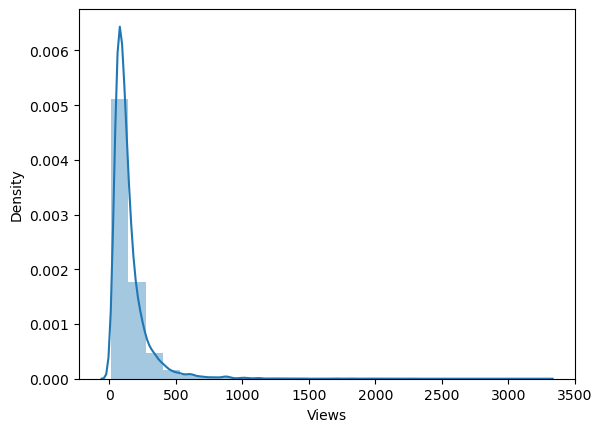

In [6]:
# Extreme values check
sns.distplot(df['Views'], bins=25) # Shows extreme values
# Extreme values exist

In [7]:
df['Views'].mean() # Check the mean

147.36428717529148

In [8]:
df['Views'].median() # Check the median

107.0

In [9]:
df['Views'].max() # Check the max

3263

In [17]:
df.shape

(9778, 14)

# Data prep for regression analysis 

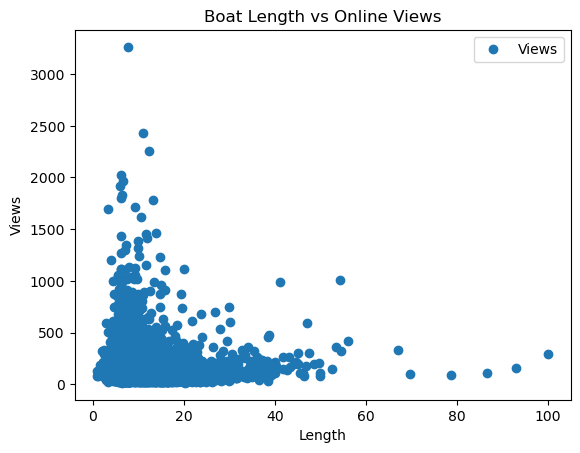

In [22]:
# Create a scatterplot 

df.plot(x = 'Length', y='Views',style='o')
plt.title('Boat Length vs Online Views')  
plt.xlabel('Length')  
plt.ylabel('Views')  
plt.show()

### Hypothesis

The shorter boats accumulated more views in the past 7 days. 

In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Length'].values.reshape(-1,1)
y = df['Views'].values.reshape(-1,1)

In [30]:
import sys
np.set_printoptions(threshold=sys.maxsize) # code for being able to see the full array output

In [31]:
X

array([[  4.  ],
       [  4.  ],
       [  3.69],
       [  3.  ],
       [  3.55],
       [  4.03],
       [  6.2 ],
       [  3.  ],
       [  3.64],
       [  4.35],
       [  4.35],
       [  4.13],
       [  4.7 ],
       [  4.4 ],
       [  3.72],
       [  3.88],
       [  4.31],
       [  4.  ],
       [  8.  ],
       [  6.37],
       [  3.55],
       [  3.78],
       [  4.31],
       [  5.6 ],
       [  6.53],
       [  5.7 ],
       [  4.  ],
       [  3.55],
       [  5.6 ],
       [  4.01],
       [  4.84],
       [  5.05],
       [  3.81],
       [  3.55],
       [  4.41],
       [  6.2 ],
       [  5.4 ],
       [  3.93],
       [  4.4 ],
       [  4.  ],
       [  4.36],
       [  3.88],
       [  4.3 ],
       [  5.2 ],
       [  4.4 ],
       [  5.5 ],
       [  5.85],
       [  4.3 ],
       [  4.45],
       [  4.01],
       [  4.3 ],
       [  4.15],
       [  4.5 ],
       [  4.2 ],
       [  4.05],
       [  4.  ],
       [  4.51],
       [  3.95],
       [  5.  

In [32]:
y

array([[ 226],
       [  75],
       [ 124],
       [  64],
       [  58],
       [ 132],
       [ 474],
       [ 134],
       [  45],
       [ 180],
       [ 239],
       [ 145],
       [  69],
       [ 113],
       [ 413],
       [ 263],
       [ 462],
       [ 124],
       [ 265],
       [ 330],
       [  69],
       [ 198],
       [  90],
       [  98],
       [ 383],
       [ 160],
       [ 295],
       [ 130],
       [ 641],
       [ 512],
       [ 202],
       [ 423],
       [ 105],
       [ 120],
       [ 255],
       [1804],
       [ 849],
       [ 144],
       [ 133],
       [  98],
       [ 393],
       [  54],
       [ 201],
       [ 186],
       [ 118],
       [  74],
       [ 543],
       [  57],
       [ 219],
       [  67],
       [ 217],
       [ 389],
       [ 178],
       [ 141],
       [ 278],
       [  99],
       [ 195],
       [1201],
       [ 204],
       [ 277],
       [  85],
       [ 122],
       [ 183],
       [ 289],
       [ 324],
       [ 184],
       [ 1

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [34]:
regression = LinearRegression()

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
y_predicted = regression.predict(X_test)

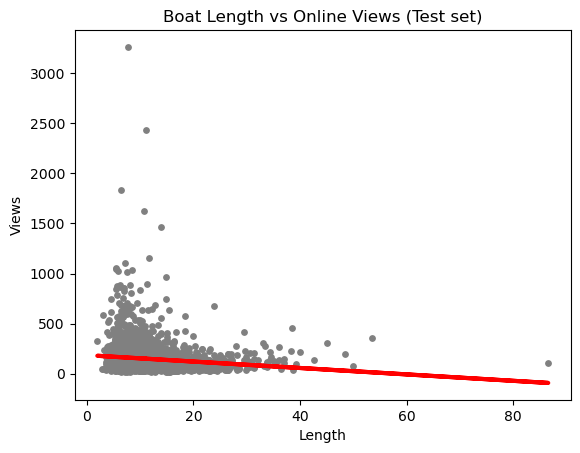

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat Length vs Online Views (Test set)')
plot_test.xlabel('Length')
plot_test.ylabel('Views')
plot_test.show()

### Interpretation

The regression line is not fitting the data well, with multiple data points being away from the line.

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.20546405]]
Mean squared error:  22549.342375339478
R2 score:  0.01986192977437673


### Slope

The slope is -3.205 which means that as the boat length rises, the online views fall, which is in accordance with the hypothesis.

### MSE

The MSE is 22,549.34 which is very high and indicates that the regression line is far from the data points, and therefor not accurate.

### r-squared value (R2 score)

The R2 score is 0.019 which is very low and indicates a poor fit for the model.

In [40]:
y_predicted

array([[148.54389956],
       [141.49187866],
       [166.94326318],
       [164.09040018],
       [132.83712573],
       [158.8013845 ],
       [ 84.40256401],
       [139.88914663],
       [169.05886945],
       [136.68368259],
       [164.09040018],
       [ 94.46772111],
       [138.60696102],
       [153.83291523],
       [ 86.51817028],
       [148.96060988],
       [134.27958455],
       [118.73308394],
       [151.23648935],
       [146.94116753],
       [153.03154922],
       [123.73360785],
       [148.92855524],
       [141.71626114],
       [153.73675131],
       [137.00422899],
       [166.04573324],
       [166.97531782],
       [158.03207313],
       [109.21285572],
       [153.99318843],
       [140.658458  ],
       [164.53916514],
       [162.96848776],
       [160.72466293],
       [140.59434872],
       [135.27327841],
       [121.61800158],
       [147.80664283],
       [170.98214787],
       [159.12193091],
       [146.94116753],
       [161.36575574],
       [159

In [41]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,178,148.543900
1,115,141.491879
2,126,166.943263
3,73,164.090400
4,39,132.837126
5,163,158.801385
6,143,84.402564
7,57,139.889147
8,116,169.058869
9,69,136.683683


The predicted values are very far off from the actual ones, adding proof to the notion that this model does not fit the data.

However, as there are many extreme values in the views column, I am wondering whether this is affecting the model.

# Outliers removed

In [14]:
# Remove outliers with the percentile method

low, high = np.percentile(df['Views'], [1, 99])
new_df = df[(df['Views'] > low) & (df['Views'] < high)]

In [16]:
new_df.shape

(9569, 14)

/Users/zoipisourika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views', ylabel='Density'>

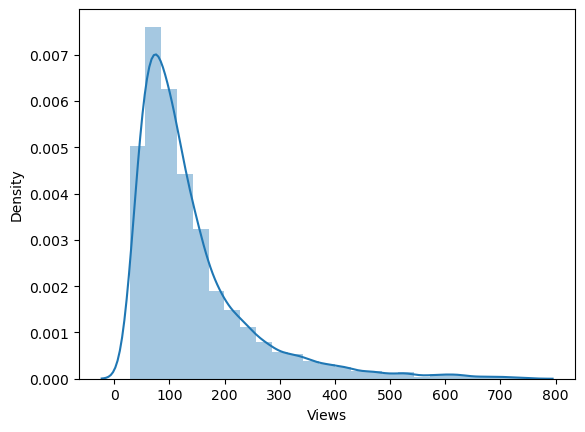

In [20]:
# Extreme values check for new df
sns.distplot(new_df['Views'], bins=25) # Shows extreme values

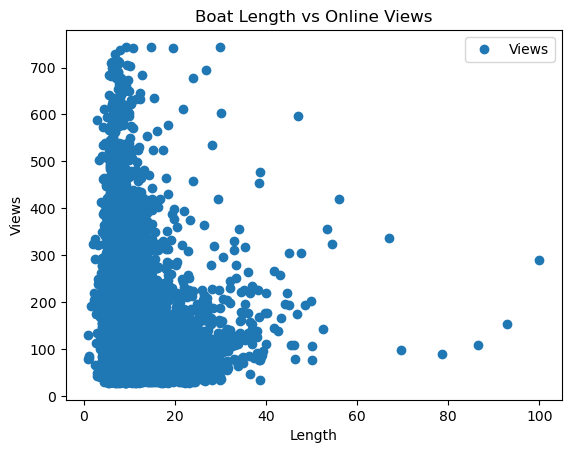

In [42]:
# Create a scatterplot 

new_df.plot(x = 'Length', y='Views',style='o')
plt.title('Boat Length vs Online Views')  
plt.xlabel('Length')  
plt.ylabel('Views')  
plt.show()

In [44]:
# Reshape again.

X_2 = new_df['Length'].values.reshape(-1,1)
y_2 = new_df['Views'].values.reshape(-1,1)

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [46]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [48]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.69524778]]
Mean squared error:  11187.716679274083
R2 score:  0.025779370280474723


### Slope

It is still negative, providing support for the hypothesis

### MSE

The value dropped from 22,549 to 11,1187, which is almost half and a big difference. However it is still very high, suggesting that the model does not fit the data even with the extreme values removed.

### R2 score

The R2 score is 0.025, which is slightly higher than the previous 0.019, but still very low.

The model therefore does not fit the data and the null hypothesis is confirmed, that boat length does not affect online views. 

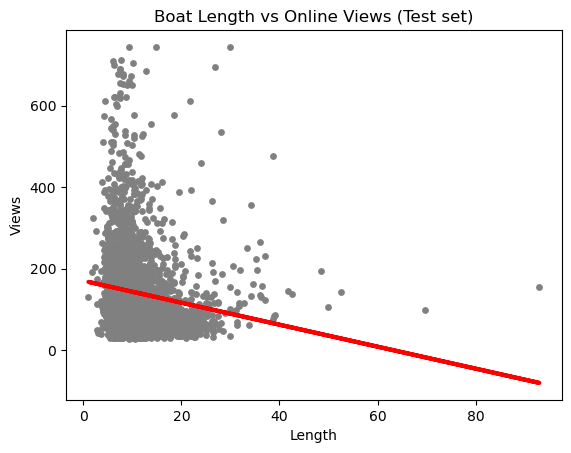

In [50]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Boat Length vs Online Views (Test set)')
plot_test.xlabel('Length')
plot_test.ylabel('Views')
plot_test.show()

The line defnitely has a steeper slope than with the outliers included, but there is a very large amount of data points that are very far away from the line. 

In [51]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,89,132.317266
1,171,146.548174
2,140,138.192906
3,151,153.582771
4,124,151.426572
5,162,157.544785
6,180,158.811551
7,37,136.845282
8,125,139.486625
9,143,129.702875
